<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/Limpiar_la_base_Senado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpiar la base

In [2]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d leonardocaravaggio/scraps-pdfs

Mounted at /content/drive
 98% 417M/424M [00:09<00:00, 47.3MB/s]
100% 424M/424M [00:09<00:00, 46.5MB/s]


In [4]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [6]:
# Se lee la base
base=pd.read_csv('/content/base_parseada.csv')

<ipython-input-6-7b0a5b8eae79>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  base=pd.read_csv('/content/base_parseada.csv')


In [7]:
base.columns

Index(['Unnamed: 0', 'Nombre/Cargo', 'Discurso', 'Cargo', 'Nombre', 'Link',
       'Legislatura', 'tipo', 'fecha', 'fecha_formato', 'nombre', 'apellidos',
       'procedLiteral', 'procedLugar', 'grupoNombre'],
      dtype='object')

In [8]:
base.grupoNombre.unique()

array(['GPP', nan, 'GPS', 'GPCIU', 'GPMX', 'GPV', 'GPEPC', 'GPN', 'GPCDL',
       'GP', 'GPPOD', 'GPCs', 'GPIC', 'GPER', 'GPERB', 'GPPSI', 'GPD',
       'GS', 'GPSA', 'GPSV', 'GPUCD', 'GPCP', 'GSNV', 'GPCDIS', 'GPSNV',
       'GPCDS', 'GMX', 'GCDS', 'GCIU', 'GPECP', 'GPCC', 'GPSN'],
      dtype=object)

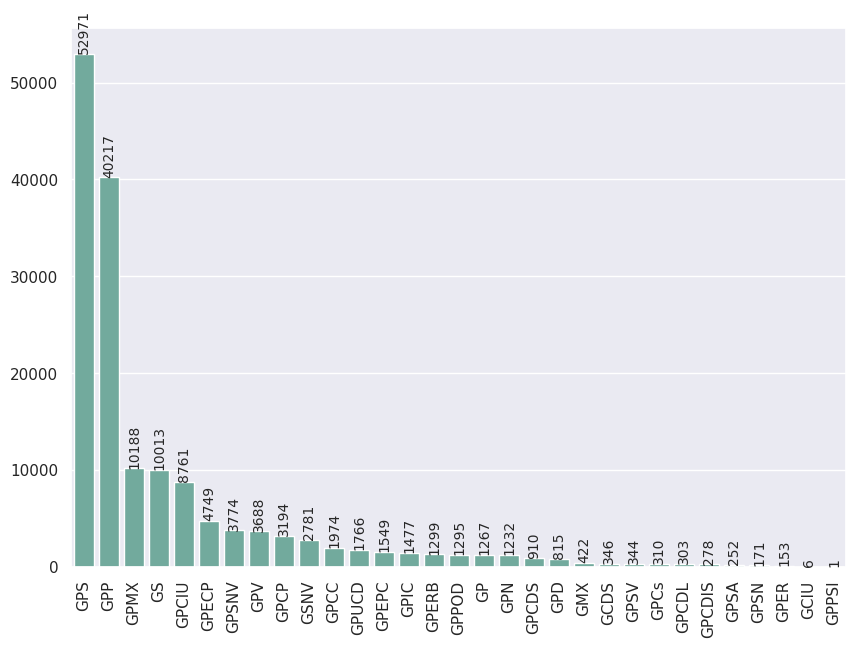

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

grupoNombre_counts = base.grupoNombre.value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))
# Create a bar plot
ax = sns.barplot(x=grupoNombre_counts.index, y=grupoNombre_counts.values, estimator=sum, errorbar=None, color='#69b3a2')

plt.xticks(rotation=90)

# Annotate each bar with its value
for i, v in enumerate(grupoNombre_counts.values):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10, rotation=90)


plt.show()

In [24]:
import pandas as pd
a=pd.DatetimeIndex(base.fecha_formato).year.unique().tolist()
a.sort()
for x in a:
  print(f"{x}: {base[pd.DatetimeIndex(base.fecha_formato).year==x].grupoNombre.unique()}")

1979: [nan 'GS' 'GPP' 'GPSA' 'GPSV' 'GPUCD' 'GPS' 'GPCP' 'GPMX' 'GSNV' 'GPCDIS'
 'GPCIU']
1980: [nan 'GPCP' 'GPMX' 'GPSV' 'GPS' 'GPUCD' 'GPCIU' 'GPCDIS' 'GPP' 'GS' 'GPSA']
1981: [nan 'GPUCD' 'GPS' 'GPMX' 'GPCDIS' 'GPP' 'GPSA' 'GPSV' 'GPCP' 'GSNV' 'GS'
 'GP' 'GPCIU']
1982: [nan 'GS' 'GPS' 'GPP' 'GPUCD' 'GPCDIS' 'GPCP' 'GPSV' 'GPMX' 'GPSA' 'GSNV'
 'GP' 'GPCIU']
1983: [nan 'GPP' 'GPS' 'GS' 'GPCP' 'GPMX' 'GSNV' 'GPSNV']
1984: [nan 'GPP' 'GS' 'GPS' 'GPCP' 'GSNV' 'GPMX' 'GPSNV']
1985: [nan 'GSNV' 'GPMX' 'GPP' 'GS' 'GPS' 'GPCP' 'GPSNV']
1986: [nan 'GPP' 'GPCP' 'GSNV' 'GS' 'GPS' 'GPMX' 'GPSNV' 'GPCDS' 'GP' 'GMX']
1987: [nan 'GPMX' 'GPCDS' 'GPCP' 'GPS' 'GPP' 'GPCIU' 'GPSNV' 'GMX' 'GS' 'GSNV'
 'GP' 'GCDS']
1988: [nan 'GPMX' 'GP' 'GPS' 'GPP' 'GPCDS' 'GMX' 'GS' 'GPCP' 'GPSNV' 'GCDS'
 'GSNV' 'GPCIU']
1989: [nan 'GPCP' 'GPCDS' 'GPS' 'GPMX' 'GSNV' 'GPSNV' 'GMX' 'GS' 'GPP' 'GCDS'
 'GP']
1990: [nan 'GS' 'GPS' 'GPP' 'GP' 'GSNV' 'GCDS' 'GMX' 'GCIU' 'GPMX']
1991: [nan 'GS' 'GPP' 'GSNV' 'GPS' 'GCDS' 'GPSNV

In [25]:
base.head()

,Unnamed: 0,Nombre/Cargo,Discurso,Cargo,Nombre,Link,Legislatura,tipo,fecha,fecha_formato,nombre,apellidos,procedLiteral,procedLugar,grupoNombre
0,0,El señor PRESIDENTE DE LA JUNTA PREPARATORIA (...,Se abre la sesión.,PRESIDENTE DE LA JUNTA PREPARATORIA,Alcalde Sánchez,https://www.senado.es/legis10/publicaciones/pd...,10,JUNTA PREPARATORIA Y SESIÓN CONSTITUTIVACORTES...,13 de diciembre de 2011,2011-12-13,GUSTAVO,ALCALDE SÁNCHEZ,Designado,Designado: Cortes de Aragón,GPP
1,1,EL señor PRESIDENTE DE LA JUNTA PREPARATORIA (...,En cumplimiento de lo establecido en el aparta...,EL PRESIDENTE DE LA JUNTA PREPARATORIA,Alcalde Sánchez,https://www.senado.es/legis10/publicaciones/pd...,10,JUNTA PREPARATORIA Y SESIÓN CONSTITUTIVACORTES...,13 de diciembre de 2011,2011-12-13,GUSTAVO,ALCALDE SÁNCHEZ,Designado,Designado: Cortes de Aragón,GPP
2,2,El señor LETRADO MAYOR,"Con su permiso, señor presidente. Real Decreto...",LETRADO MAYOR,NaN,https://www.senado.es/legis10/publicaciones/pd...,10,JUNTA PREPARATORIA Y SESIÓN CONSTITUTIVACORTES...,13 de diciembre de 2011,2011-12-13,NaN,NaN,NaN,NaN,NaN
3,3,El señor PRESIDENTE DE LA JUNTA PREPARATORIA (...,"Muchas gracias, señor letrado mayor. FORMACIÓN...",PRESIDENTE DE LA JUNTA PREPARATORIA,Alcalde Sánchez,https://www.senado.es/legis10/publicaciones/pd...,10,JUNTA PREPARATORIA Y SESIÓN CONSTITUTIVACORTES...,13 de diciembre de 2011,2011-12-13,GUSTAVO,ALCALDE SÁNCHEZ,Designado,Designado: Cortes de Aragón,GPP
4,4,El señor PRESIDENTE DE LA JUNTA PREPARATORIA (...,"A continuación, de acuerdo con el artículo 3 d...",PRESIDENTE DE LA JUNTA PREPARATORIA,Alcalde Sánchez,https://www.senado.es/legis10/publicaciones/pd...,10,JUNTA PREPARATORIA Y SESIÓN CONSTITUTIVACORTES...,13 de diciembre de 2011,2011-12-13,GUSTAVO,ALCALDE SÁNCHEZ,Designado,Designado: Cortes de Aragón,GPP


In [39]:
base=base[base['grupoNombre'].notna()]

In [64]:
base.shape

(156506, 16)

In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])
stopwords.extend(['continuación', 'votamos', 'telemático', 'republicanaizquierda', 'unidainiciativa', 'puede', 'bien', 'propuesta' ,'abstencion', 'mayoría', 'absoluta', 'pregunta', 'don', 'vamos', 'votar', 'llevar', 'cabo', 'millón', 'muchas', 'gracias'])

In [62]:
# Esta celda tarda unos 20 minutos en correr
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import numpy as np

porter_stemmer = PorterStemmer()

new_tokens_list = []

for row in base.Discurso:
    if isinstance(row, str):  # Check if the row is a string
        # Remove punctuation
        non_punctuation = row.replace('-', ' ')
        non_punctuation = non_punctuation.translate(str.maketrans('', '', string.punctuation))

        word_tokens = word_tokenize(non_punctuation)

        # Remove stopwords and perform stemming
        tokens = [porter_stemmer.stem(w) for w in word_tokens if not w.lower() in stopwords]

        new_tokens_list.append(tokens)

    else:
        new_tokens_list.append([])

base['tokens'] = new_tokens_list

# Guardar la base

In [65]:
base.to_csv('/content/drive/MyDrive/base_formateada.csv')